<a href="https://colab.research.google.com/github/kavya-42/ML-projects-lab/blob/main/AIML_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project for Module: Perceptron and Gradient Descent**

# Notebook Imports and Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function
f(x)=x2+x+1

In [ ]:
def f(x):
    return x ** 2 + x + 1

In [ ]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

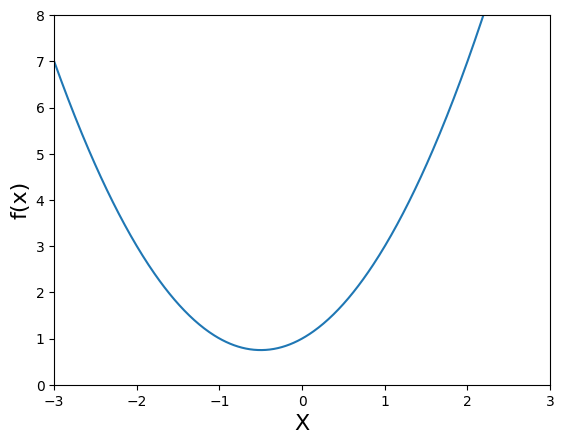

In [ ]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope & Derivatives
Creating a function for the derivative of  f(x)  called df(x)

In [ ]:
def df(x):
    return 2 * x + 1

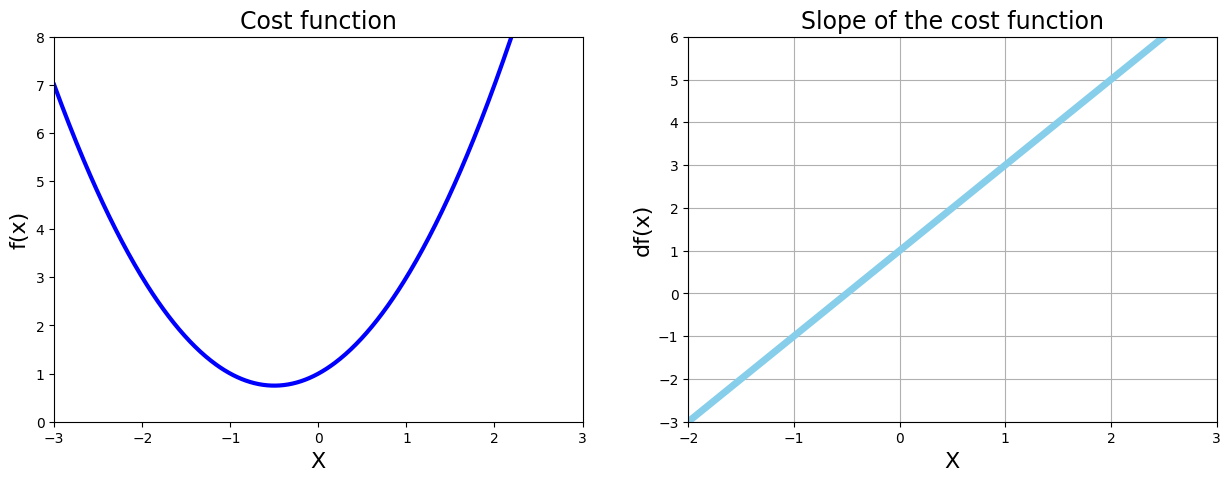

In [ ]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

# Gradient Descent

In [ ]:
# Gradient Descent
new_x = 3  # Starting point
previous_x = 0  # To track the previous x value
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Threshold to stop

x_list = [new_x]  # To store x values during descent
slope_list = [df(new_x)]  # To store slopes during descent

for n in range(500):
    previous_x = new_x  # Store the current x as previous for comparison
    gradient = df(previous_x)  # [REQUIRED] Calculate the gradient (slope)
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update x using gradient descent formula

    step_size = abs(new_x - previous_x)  # Calculate the step size

    x_list.append(new_x)  # [REQUIRED] Store the new x value
    slope_list.append(df(new_x))  # [REQUIRED] Store the slope at the new x

    if step_size < precision:  # If step size is smaller than precision, stop the loop
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


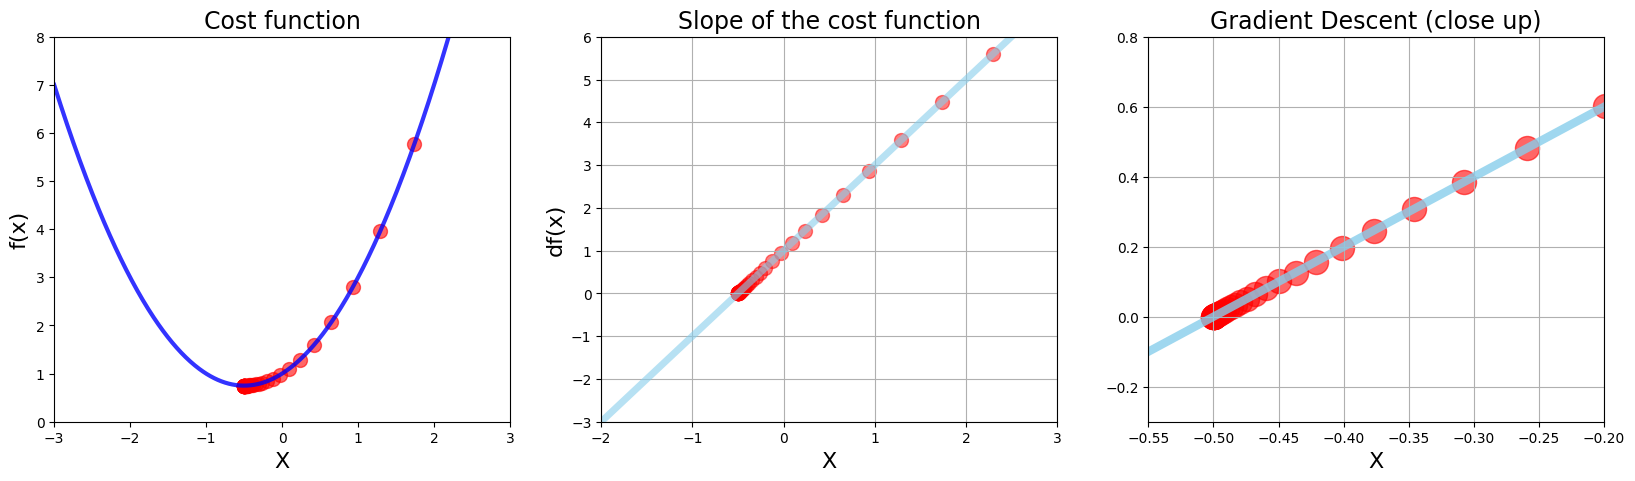

In [ ]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions
g(x)=x4−4x2+5

In [ ]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Define the function g(x)
def g(x):
    return x**4 - 4 * x**2 + 5  # [REQUIRED]

# Define the derivative of g(x)
def dg(x):
    return 4 * x**3 - 8 * x  # [REQUIRED]


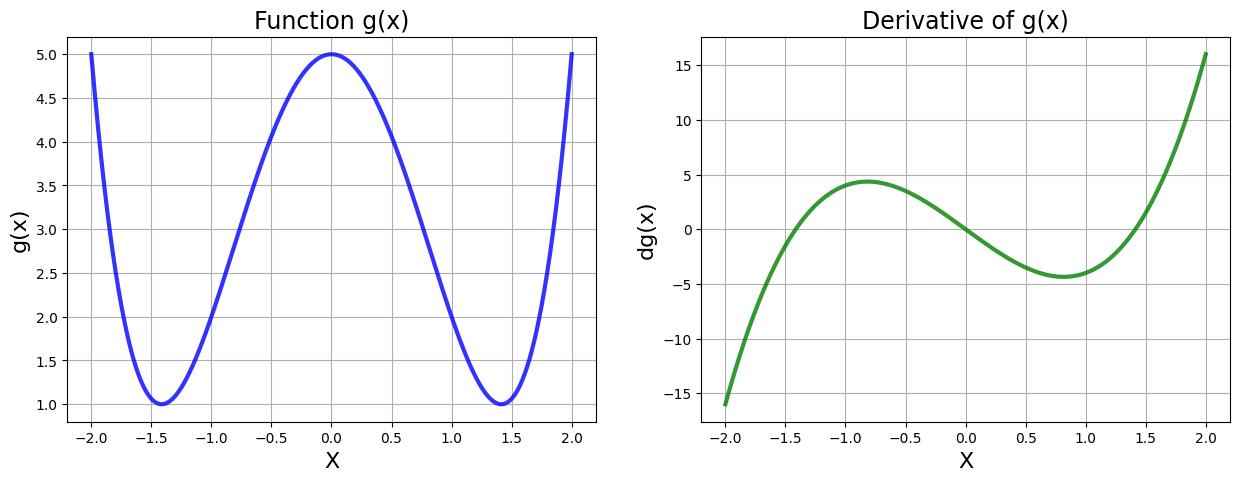

In [ ]:
# Task-3: Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1st Chart: Function g(x)
plt.subplot(1, 2, 1)
plt.title('Function g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.grid()

# Plot g(x)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# 2nd Chart: Derivative of g(x)
plt.subplot(1, 2, 2)
plt.title('Derivative of g(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()

# Plot the derivative dg(x)
plt.plot(x_2, dg(x_2), color='green', linewidth=3, alpha=0.8)

plt.show()


# Gradient Descent

In [ ]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


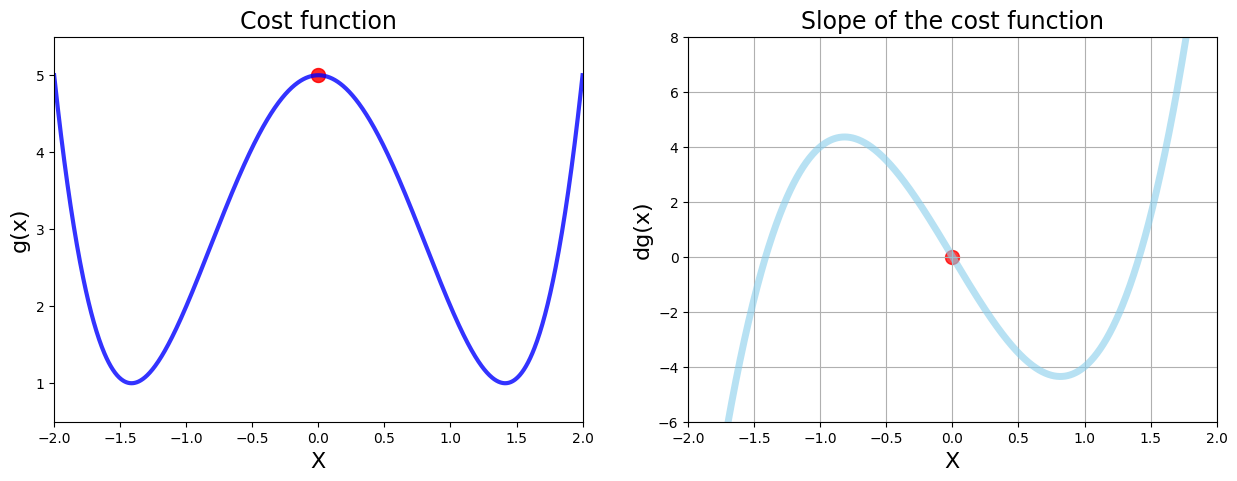

In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow
h(x)=x5−2x4+2

In [ ]:
# Make data for h(x)
x_3 = np.linspace(-2, 3, 1000)

# Define the function h(x)
def h(x):
    return x**5 - 2 * x**4 + 2

# Define the derivative of h(x)
def dh(x):
    return 5 * x**4 - 8 * x**3


In [ ]:
# Gradient Descent function (same as before)
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list


In [ ]:
# Call gradient descent with an initial guess of 0.5
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=0.5, multiplier=0.02)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))



Local min occurs at: 1.5985746230243199
Number of steps: 35


In [ ]:
local_min, list_x, deriv_list = gradient_descent(dh, 1.8, multiplier=0.02, precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: 1.6009540606408823
Number of steps: 10


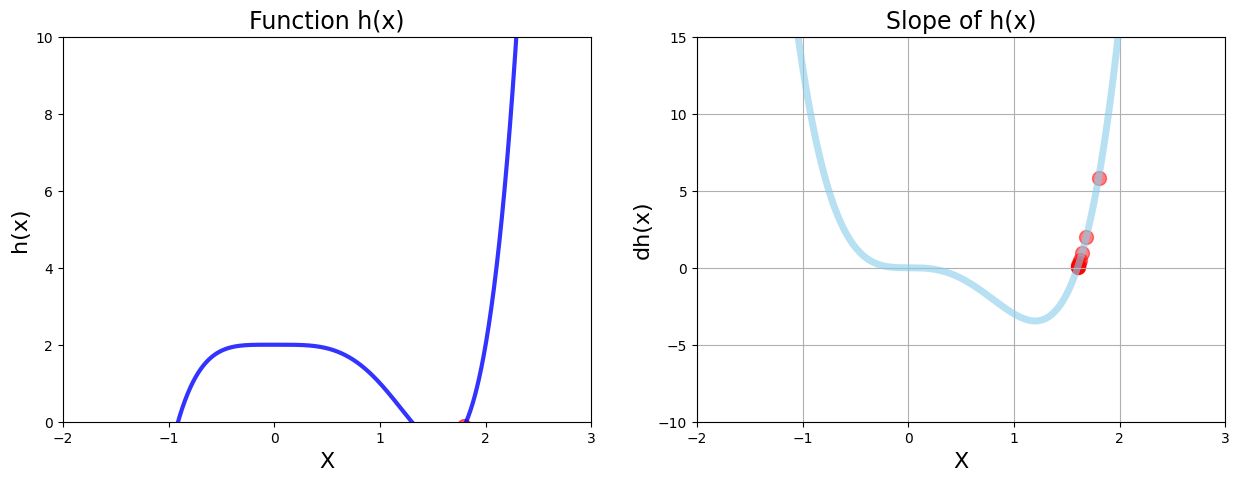

In [ ]:
# Plot function and derivative side by side with gradient descent path
plt.figure(figsize=[15, 5])

# 1st Chart: Function h(x)
plt.subplot(1, 2, 1)
plt.xlim(-2, 3)
plt.ylim(0, 10)
plt.title('Function h(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd Chart: Derivative of h(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-10, 15)
plt.title('Slope of h(x)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


# The Learning Rate

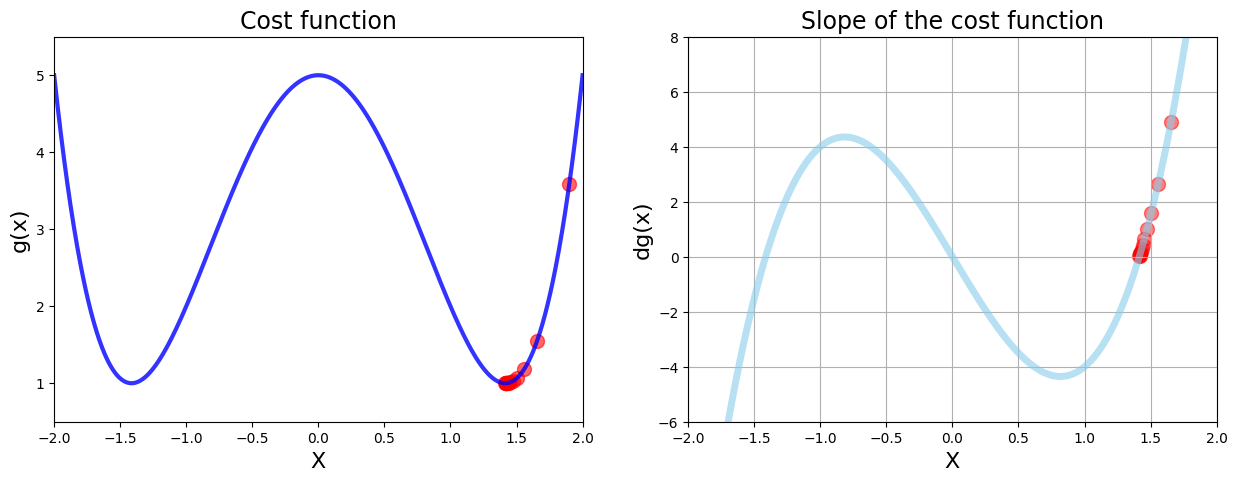

Number of steps is:  14


In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

In [ ]:
# TASK-5: Run gradient descent 3 times with different initial guesses

# First run with an initial guess of 1.0
low_gamma_result = gradient_descent(derivative_func=dg, initial_guess=1.0,
                                     multiplier=0.02, precision=0.0001, max_iter=100)
print('Low gamma (initial guess 1.0):')
print('Local min occurs at:', low_gamma_result[0])
print('Number of steps:', len(low_gamma_result[1]))

# Second run with an initial guess of -1.0
mid_gamma_result = gradient_descent(derivative_func=dg, initial_guess=-1.0,
                                     multiplier=0.001, precision=0.0001, max_iter=100)
print('Mid gamma (initial guess -1.0):')
print('Local min occurs at:', mid_gamma_result[0])
print('Number of steps:', len(mid_gamma_result[1]))

# Third run with an initial guess of 1.9
high_gamma_result = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                     multiplier=0.002, precision=0.0001, max_iter=100)
print('High gamma (initial guess 1.9):')
print('Local min occurs at:', high_gamma_result[0])
print('Number of steps:', len(high_gamma_result[1]))


Low gamma (initial guess 1.0):
Local min occurs at: 1.414029441147151
Number of steps: 23
Mid gamma (initial guess -1.0):
Local min occurs at: -1.2907026967342268
Number of steps: 101
High gamma (initial guess 1.9):
Local min occurs at: 1.4263954849548155
Number of steps: 101


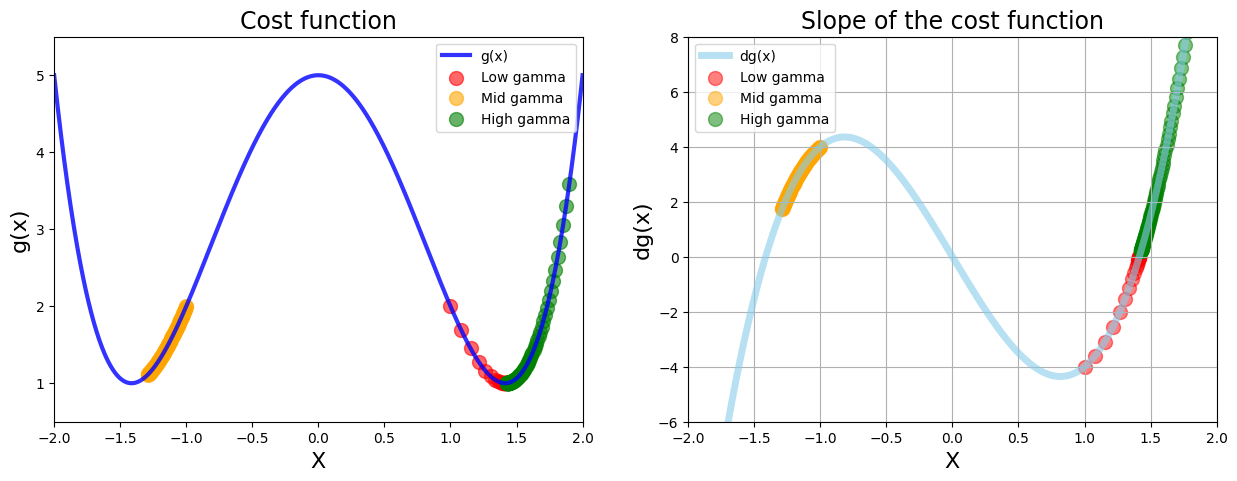

In [ ]:
# TASK-6: Plot the results for the three learning rates
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

# Plot the original function
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

# Plot the results for different learning rates
for result, color in zip(
        [low_gamma_result, mid_gamma_result, high_gamma_result],
        ['red', 'orange', 'green']):
    plt.scatter(result[1], g(np.array(result[1])), color=color, s=100, alpha=0.6)

plt.legend(['g(x)', 'Low gamma', 'Mid gamma', 'High gamma'])

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

# Plot the derivative function
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)

# Plot the slopes for different learning rates
for result, color in zip(
        [low_gamma_result, mid_gamma_result, high_gamma_result],
        ['red', 'orange', 'green']):
    plt.scatter(result[1], result[2], color=color, s=100, alpha=0.5)

plt.legend(['dg(x)', 'Low gamma', 'Mid gamma', 'High gamma'])

plt.show()

In [ ]:
## TASK-7 : Plot reduction in cost for each iteration
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    cost_list = [g(new_x)]  # List to track cost at each iteration

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        cost_list.append(g(new_x))  # Append the cost

        if step_size < precision:
            break

    return new_x, x_list, slope_list, cost_list  # Return cost_list


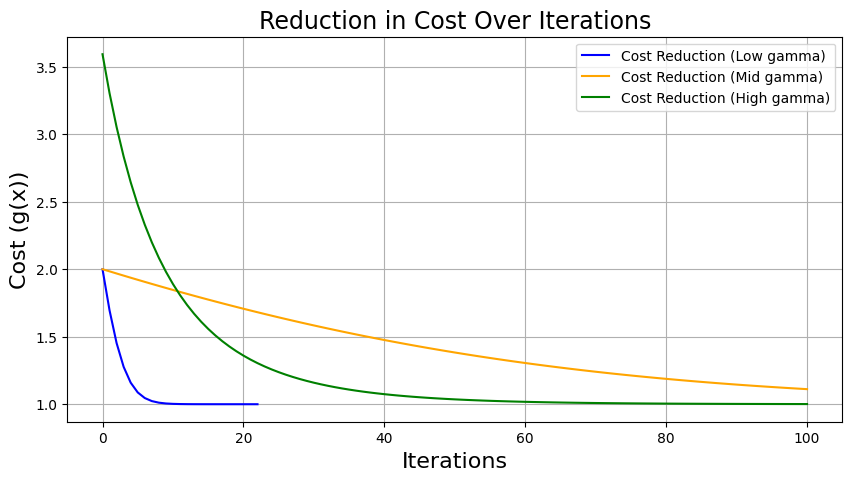

In [ ]:
# Call gradient descent with an initial guess of 1.0 for low gamma
low_gamma_result = gradient_descent(derivative_func=dg, initial_guess=1.0,
                                     multiplier=0.02, precision=0.0001, max_iter=100)

# Plot reduction in cost for each iteration
plt.figure(figsize=[10, 5])

plt.title('Reduction in Cost Over Iterations', fontsize=17)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Cost (g(x))', fontsize=16)
plt.plot(low_gamma_result[3], color='blue', label='Cost Reduction (Low gamma)')

# You can repeat the process for mid_gamma and high_gamma results as well
# Run gradient descent for mid gamma
mid_gamma_result = gradient_descent(derivative_func=dg, initial_guess=-1.0,
                                     multiplier=0.001, precision=0.0001, max_iter=100)

plt.plot(mid_gamma_result[3], color='orange', label='Cost Reduction (Mid gamma)')

# Run gradient descent for high gamma
high_gamma_result = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                     multiplier=0.002, precision=0.0001, max_iter=100)

plt.plot(high_gamma_result[3], color='green', label='Cost Reduction (High gamma)')

plt.legend()
plt.grid()
plt.show()


# Example 4 - Data Viz with 3D Charts
Minimise
f(x,y)=13−x2−y2+1
Minimise
f(x,y)=1r+1
where  r  is  3−x2−y2

In [ ]:
## TASK-8 : Code the same things as they were done for the first two examples
import numpy as np
import matplotlib.pyplot as plt

# Define the first function
def f1(x, y):
    return 13 - x**2 - y**2 + 1

# Define the second function with r
def f2(x, y):
    r = 3 - x**2 - y**2
    return 1 / r + 1

# Gradient for the first function
def df1(x, y):
    return np.array([-2 * x, -2 * y])

# Gradient for the second function
def df2(x, y):
    r = 3 - x**2 - y**2
    return np.array([2 * x / (r**2), 2 * y / (r**2)])  # Derivatives of f2


In [ ]:
# Create a grid of x and y values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values on the grid
Z1 = f1(X, Y)
Z2 = f2(X, Y)


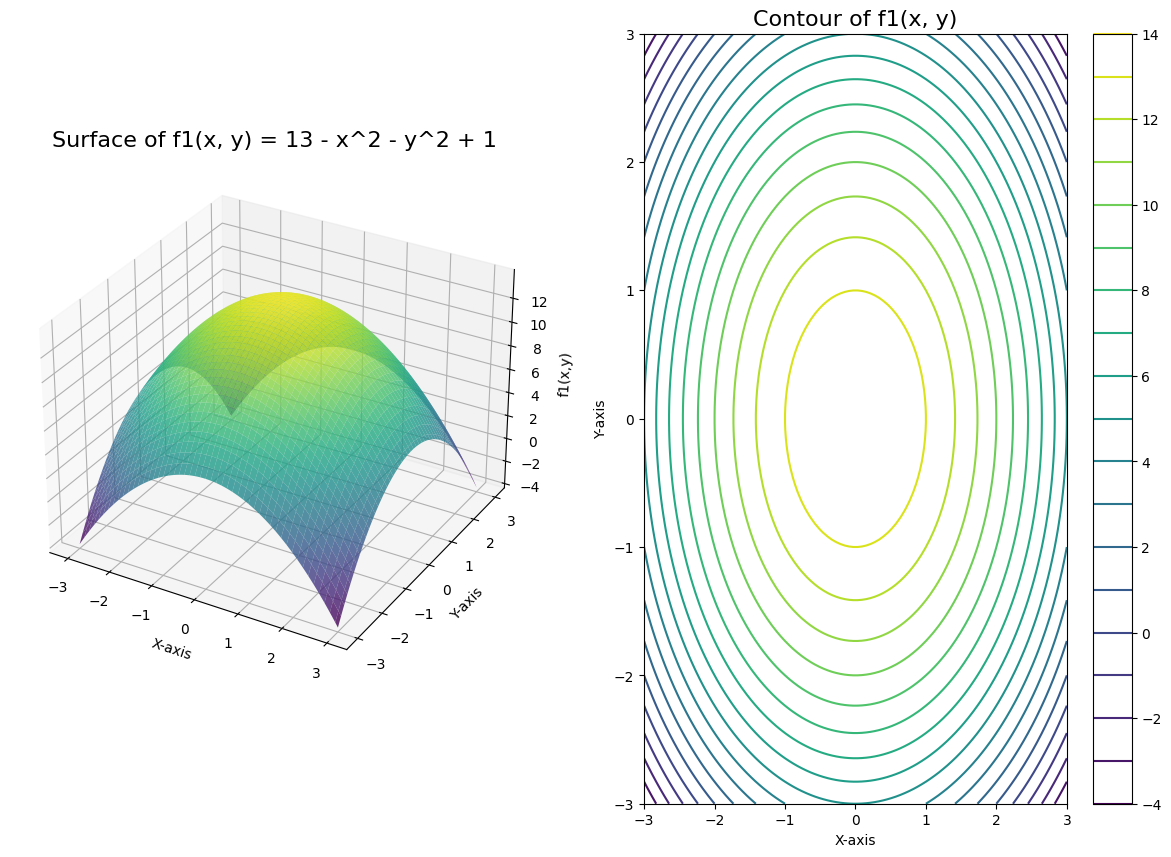

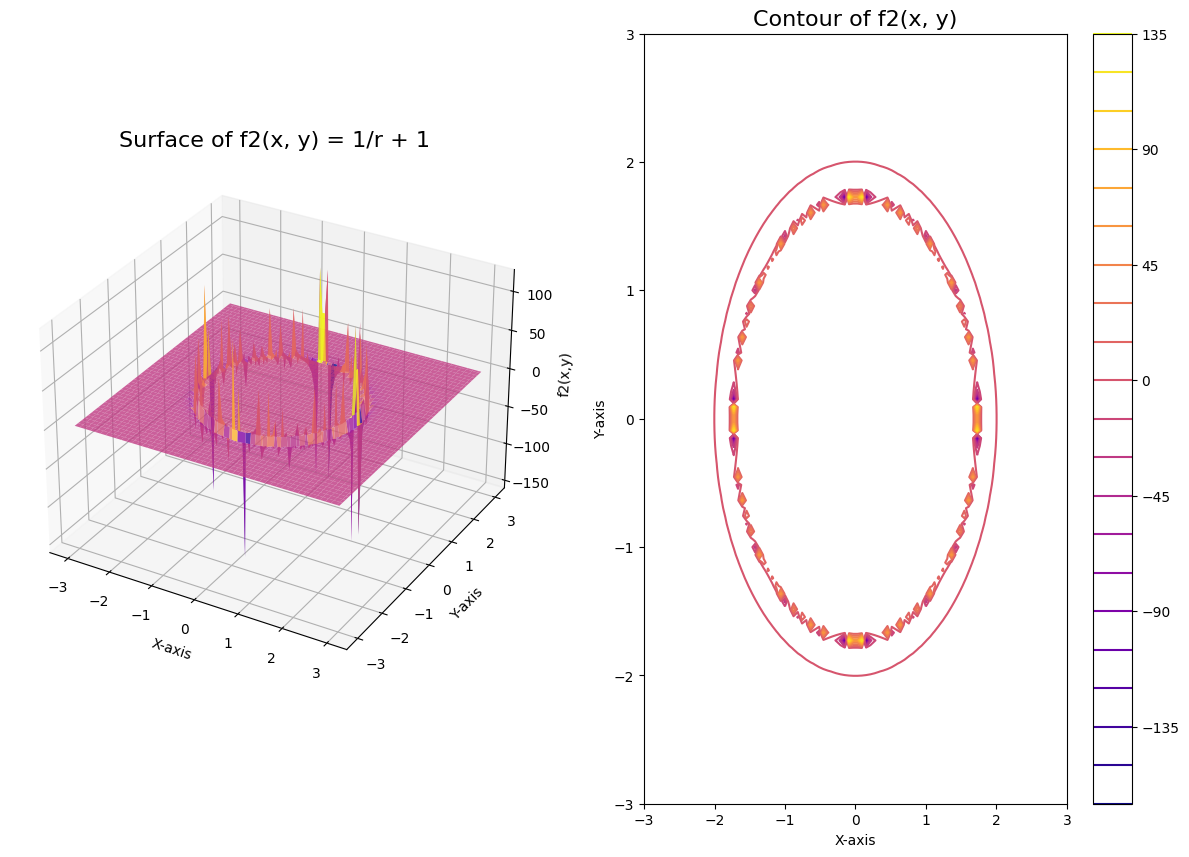

In [ ]:
# Plotting the first function
fig = plt.figure(figsize=(15, 10))

# 3D Surface plot for f1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.8)
ax1.set_title('Surface of f1(x, y) = 13 - x^2 - y^2 + 1', fontsize=16)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('f1(x,y)')

# Contour plot for f1
ax2 = fig.add_subplot(122)
contour1 = ax2.contour(X, Y, Z1, levels=20, cmap='viridis')
ax2.set_title('Contour of f1(x, y)', fontsize=16)
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
plt.colorbar(contour1)

plt.show()

# Plotting the second function
fig = plt.figure(figsize=(15, 10))

# 3D Surface plot for f2
ax3 = fig.add_subplot(121, projection='3d')
ax3.plot_surface(X, Y, Z2, cmap='plasma', alpha=0.8)
ax3.set_title('Surface of f2(x, y) = 1/r + 1', fontsize=16)
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Y-axis')
ax3.set_zlabel('f2(x,y)')

# Contour plot for f2
ax4 = fig.add_subplot(122)
contour2 = ax4.contour(X, Y, Z2, levels=20, cmap='plasma')
ax4.set_title('Contour of f2(x, y)', fontsize=16)
ax4.set_xlabel('X-axis')
ax4.set_ylabel('Y-axis')
plt.colorbar(contour2)

plt.show()


In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


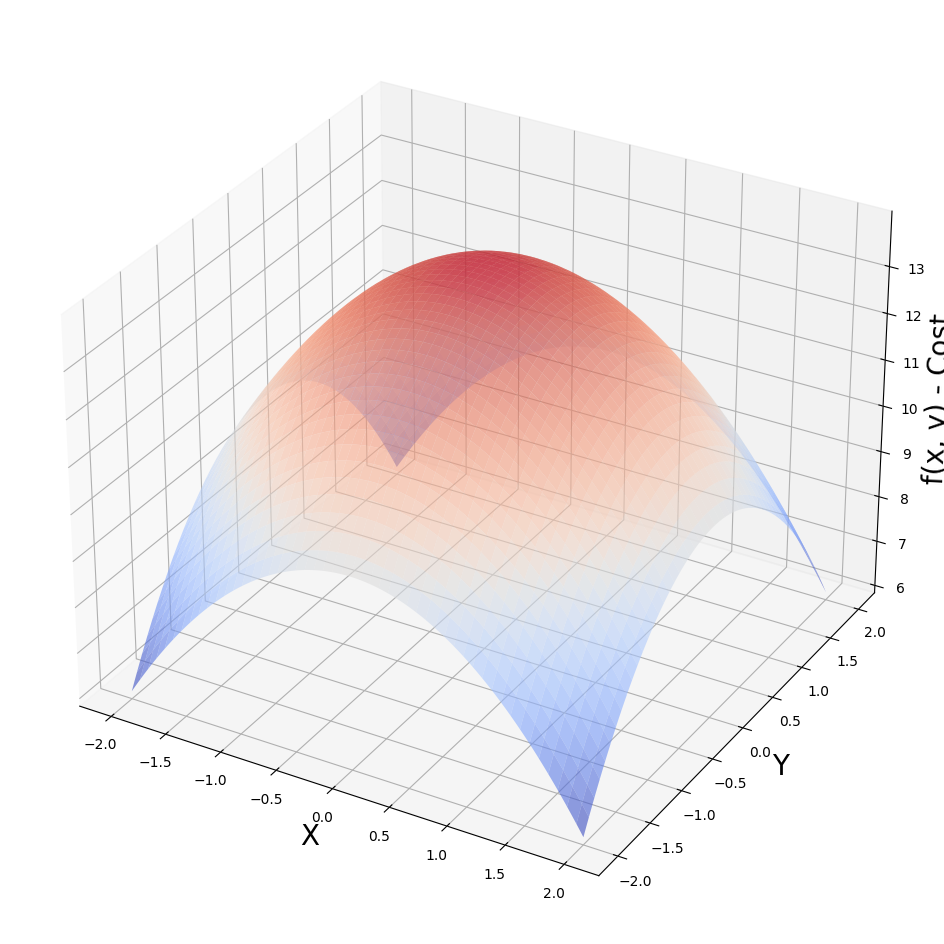

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # color map

# Define the function f(x, y)
def f(x, y):
    return 13 - x**2 - y**2 + 1

# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

# Generate a meshgrid for x and y
x_4, y_4 = np.meshgrid(x_4, y_4)

# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Set axis labels
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Compute z values for the surface plot
z_4 = f(x_4, y_4)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.6)

plt.show()


#########################

##########################

TASK-9.
##########################

##########################

Partial Derivatives & Symbolic Computation
∂x
∂f
=−2x
∂
𝑓
∂
𝑦
=
−
2
𝑦
∂y
∂f
​
 =−2y

In [ ]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  -x**2 - y**2 + 14
Partial derivative wrt x is:  -2*y
Value of f(x,y) at x=1.8 y=1.0 is:  9.76000000000000
Value of partial derivative wrt x:  -3.60000000000000


# Batch Gradient Descent with SymPy

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.16881096857237e+40 -6.49339426984649e+39]
Minimum occurs at x value of:  7.01286581143421e+39
Minimum occurs at y value of:  3.89603656190789e+39
The cost is:  -6.43593877809059e+79


In [ ]:
## TASK-10 : Complete the lines of code
def fpx(x, y):
    return -2 * x  # Partial derivative with respect to x

def fpy(x, y):
    return -2 * y  # Partial derivative with respect to y

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.16881097e+40 -6.49339427e+39]
Minimum occurs at x value of:  7.012865811434208e+39
Minimum occurs at y value of:  3.896036561907893e+39
The cost is:  -6.435938778090586e+79


# Graphing 3D Gradient Descent

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [-2.05764507e+16 -1.14313615e+16]
Minimum occurs at x value of:  1.2345870427072304e+16
Minimum occurs at y value of:  6858816903929058.0
The cost is:  -1.9946388592368145e+32


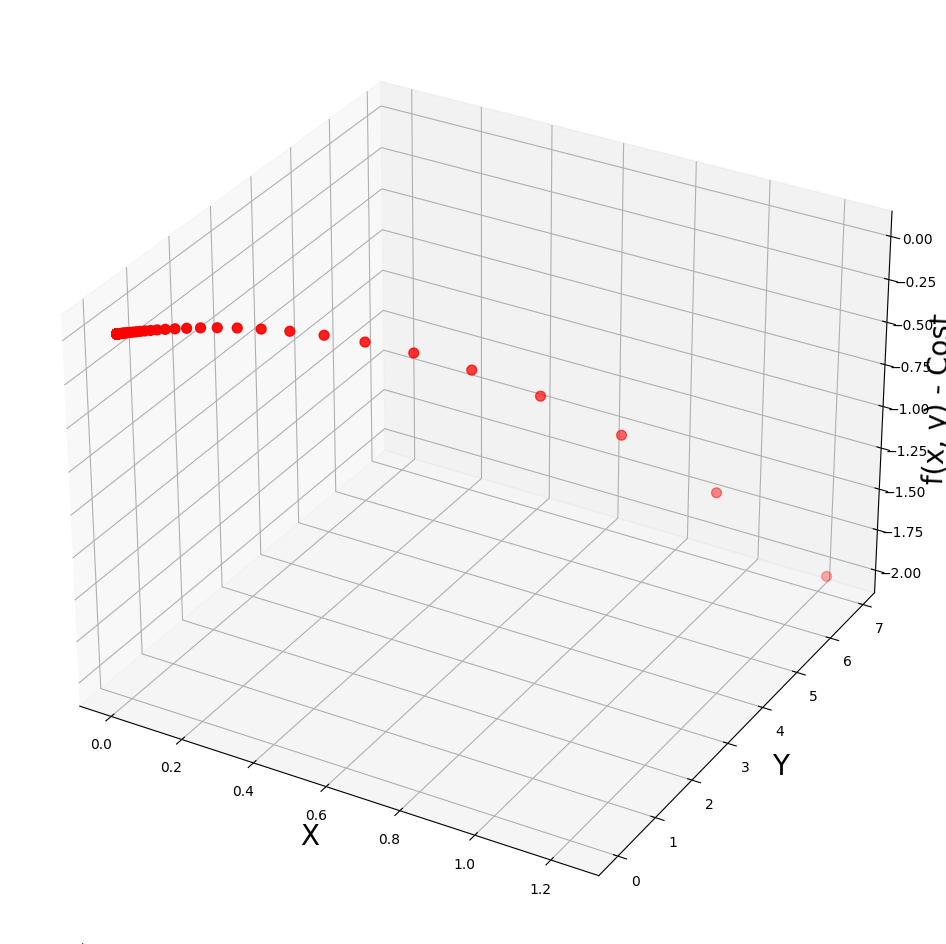

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

#For Reference, practice and play with the code below
# Example 5 - Working with Data & a Real Cost Function
Mean Squared Error: a cost function for regression problems
RSS=∑i=1n(y(i)−hθx(i))2

MSE=1n∑i=1n(y(i)−hθx(i))2

MSE=1n∑i=1n(y−y^)2

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


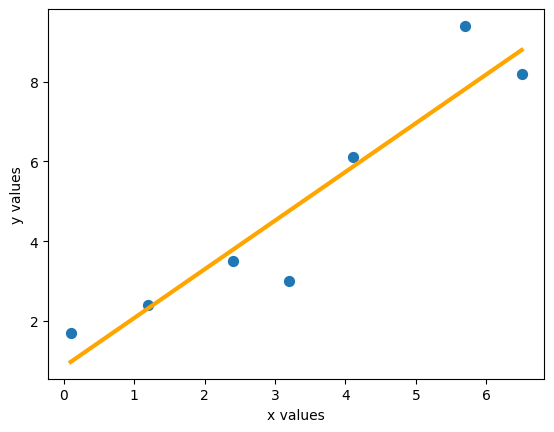

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

## Calc MSE using nested for loops

In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-54-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


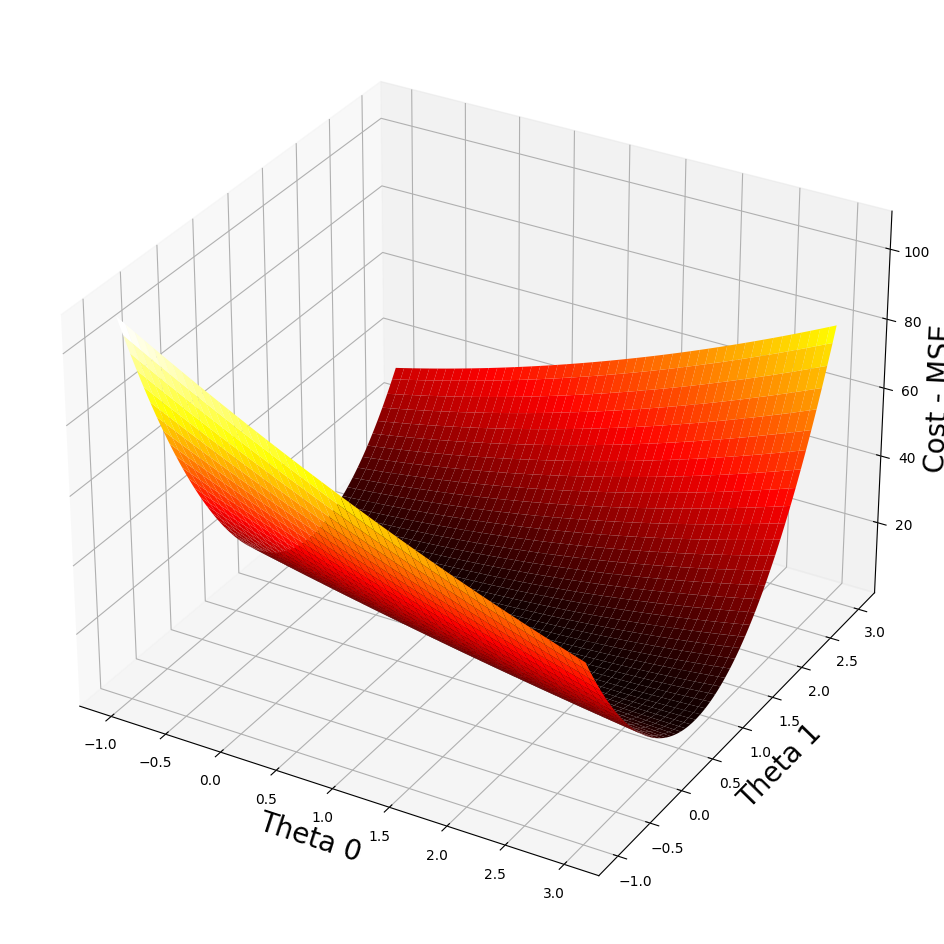

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


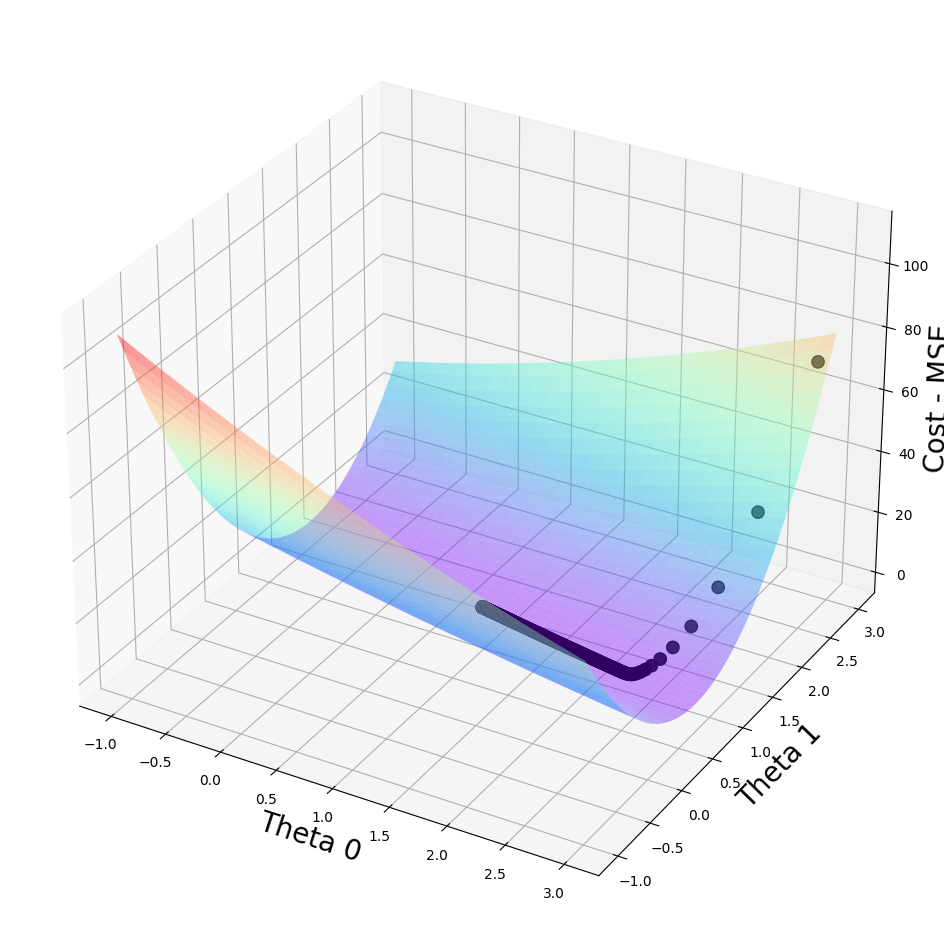

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()